### Question1:
*Super-resolution: Perform superresolution on the image shown in notebook to enhance its resolution by factor 2. Show a qualitative comparison of original and reconstructed image. (i.e display original image and the image you created side by side)*

In [ ]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

import numpy as np
import pandas as pd
import torch.nn as nn
import torch.nn.functional as F

# Remove all the warnings
import warnings
warnings.filterwarnings('ignore')

# Set env CUDA_LAUNCH_BLOCKING=1
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Retina display
%config InlineBackend.figure_format = 'retina'

try:
    from einops import rearrange
except ImportError:
    %pip install einops
    from einops import rearrange

In [ ]:
img = torchvision.io.read_image("C:\\Users\\KIIT\\Pictures\\AdobeStock_94274587_welsh_corgi_pembroke_CD.jpg")
print(img.shape)

torch.Size([3, 1365, 2048])


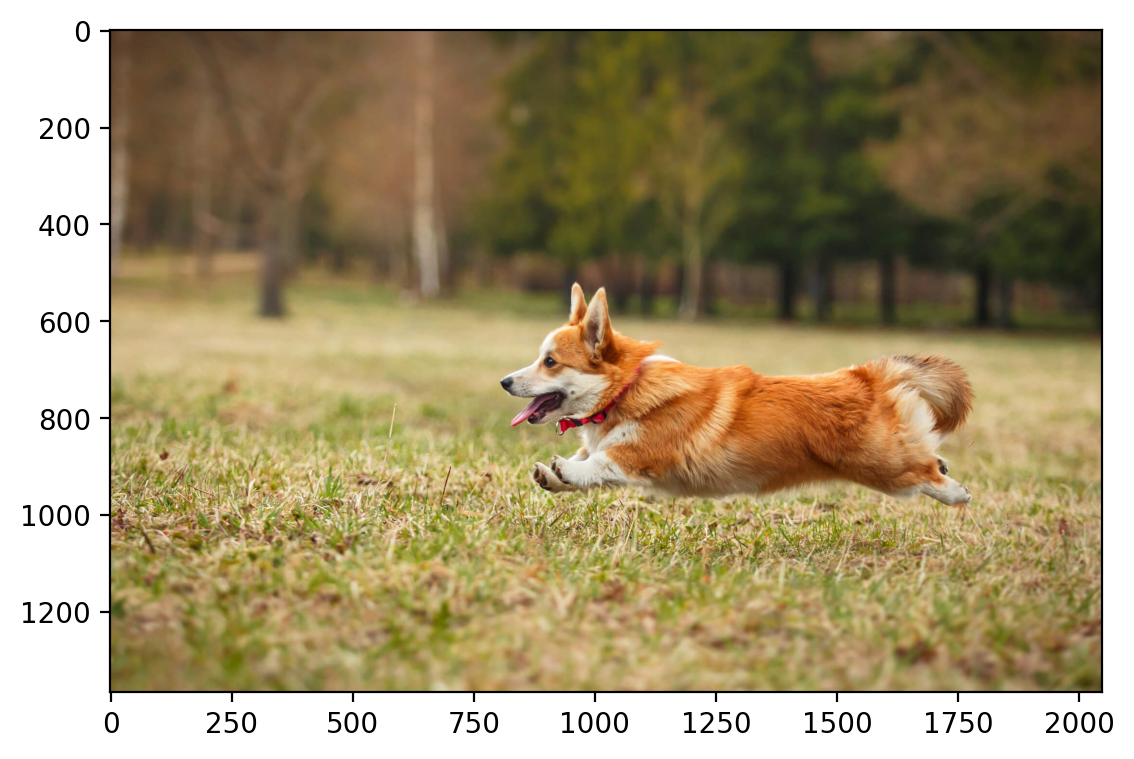

In [ ]:
plt.imshow(rearrange(img, 'c h w -> h w c').numpy())

In [ ]:
from sklearn import preprocessing

scaler_img = preprocessing.MinMaxScaler().fit(img.reshape(-1, 1))
scaler_img

MinMaxScaler()

In [ ]:
img_scaled = scaler_img.transform(img.reshape(-1, 1)).reshape(img.shape)
img_scaled.shape

img_scaled = torch.tensor(img_scaled)

In [ ]:
img_scaled = img_scaled.to(device)
img_scaled

tensor([[[0.3098, 0.3137, 0.3137,  ..., 0.2941, 0.2941, 0.2980],
         [0.3098, 0.3137, 0.3137,  ..., 0.2941, 0.2941, 0.2980],
         [0.3098, 0.3137, 0.3137,  ..., 0.2941, 0.2941, 0.2980],
         ...,
         [0.4745, 0.4745, 0.4784,  ..., 0.3804, 0.3765, 0.3765],
         [0.4745, 0.4745, 0.4784,  ..., 0.3804, 0.3804, 0.3765],
         [0.4745, 0.4745, 0.4784,  ..., 0.3843, 0.3804, 0.3804]],

        [[0.2039, 0.2078, 0.2078,  ..., 0.2157, 0.2157, 0.2118],
         [0.2039, 0.2078, 0.2078,  ..., 0.2157, 0.2157, 0.2118],
         [0.2039, 0.2078, 0.2078,  ..., 0.2157, 0.2157, 0.2118],
         ...,
         [0.4039, 0.4039, 0.4078,  ..., 0.3216, 0.3176, 0.3176],
         [0.4039, 0.4039, 0.4078,  ..., 0.3216, 0.3216, 0.3176],
         [0.4039, 0.4039, 0.4078,  ..., 0.3255, 0.3216, 0.3216]],

        [[0.1373, 0.1412, 0.1412,  ..., 0.1176, 0.1176, 0.1176],
         [0.1373, 0.1412, 0.1412,  ..., 0.1176, 0.1176, 0.1176],
         [0.1373, 0.1412, 0.1412,  ..., 0.1176, 0.1176, 0.

In [ ]:
crop = torchvision.transforms.functional.crop(img_scaled.cpu(), 600, 800, 400, 400)
crop.shape
crop.to(device)

tensor([[[0.7686, 0.7686, 0.7686,  ..., 0.5608, 0.5608, 0.5608],
         [0.7725, 0.7725, 0.7725,  ..., 0.5608, 0.5608, 0.5608],
         [0.7765, 0.7765, 0.7765,  ..., 0.5569, 0.5569, 0.5569],
         ...,
         [0.6196, 0.6353, 0.6353,  ..., 0.6431, 0.6471, 0.6549],
         [0.6157, 0.6706, 0.7216,  ..., 0.6824, 0.7059, 0.7216],
         [0.6353, 0.6902, 0.7294,  ..., 0.7137, 0.7490, 0.7725]],

        [[0.6941, 0.6941, 0.6941,  ..., 0.4706, 0.4706, 0.4706],
         [0.6980, 0.6980, 0.6980,  ..., 0.4706, 0.4706, 0.4706],
         [0.7020, 0.7020, 0.7020,  ..., 0.4784, 0.4784, 0.4784],
         ...,
         [0.5176, 0.5333, 0.5255,  ..., 0.4431, 0.4353, 0.4314],
         [0.5333, 0.5922, 0.6353,  ..., 0.5020, 0.5137, 0.5176],
         [0.5647, 0.6196, 0.6549,  ..., 0.5529, 0.5686, 0.5843]],

        [[0.4745, 0.4745, 0.4745,  ..., 0.3373, 0.3373, 0.3373],
         [0.4784, 0.4784, 0.4784,  ..., 0.3373, 0.3373, 0.3373],
         [0.4824, 0.4824, 0.4824,  ..., 0.3412, 0.3412, 0.

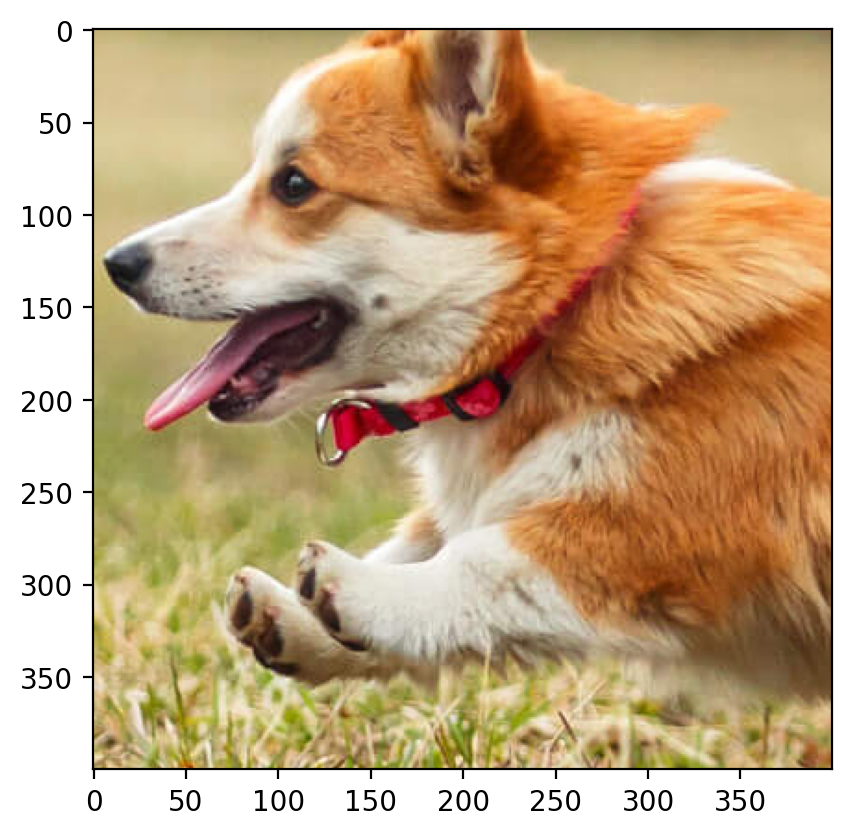

In [ ]:
plt.imshow(rearrange(crop, 'c h w -> h w c').cpu().numpy())

In [ ]:
crop_ = rearrange(crop, 'c h w -> (h w) c').float()
crop_.to(device)

tensor([[0.7686, 0.6941, 0.4745],
        [0.7686, 0.6941, 0.4745],
        [0.7686, 0.6941, 0.4745],
        ...,
        [0.7137, 0.5529, 0.3098],
        [0.7490, 0.5686, 0.3647],
        [0.7725, 0.5843, 0.4039]])

In [ ]:
import torch.nn.functional as F
resized_img_tensor = F.interpolate(crop.unsqueeze(0), size=200, mode='bilinear', align_corners=False)
resized_img_tensor = resized_img_tensor.squeeze(0)


In [ ]:
resized_img_tensor.shape

torch.Size([3, 200, 200])

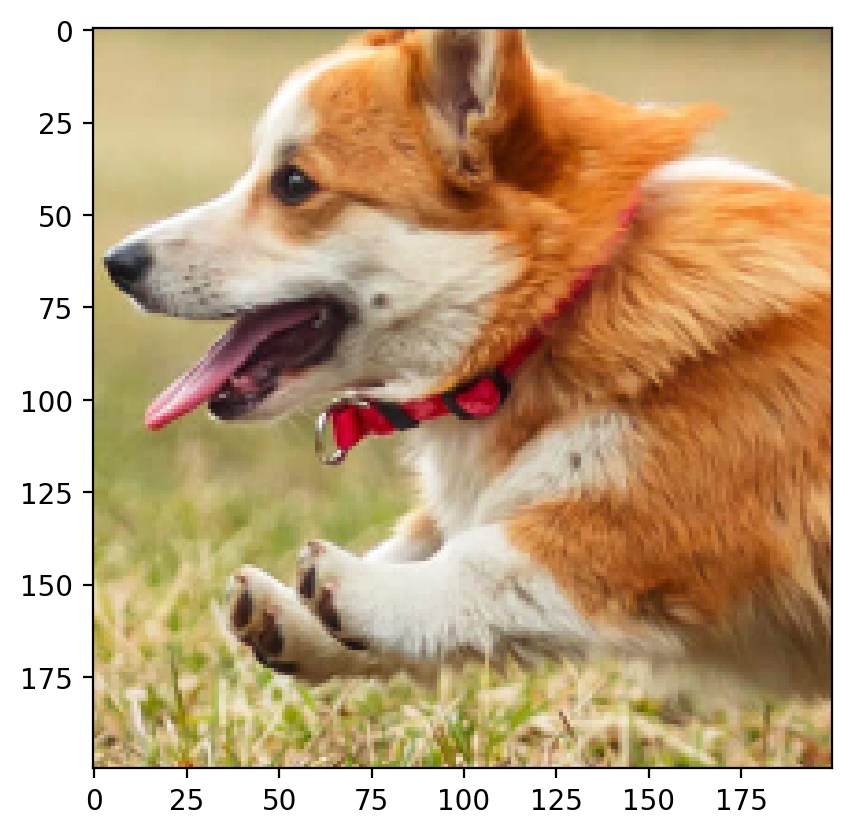

In [ ]:
plt.imshow(rearrange(resized_img_tensor, 'c h w -> h w c').cpu().numpy())


In [ ]:
img200 = rearrange(resized_img_tensor, 'c h w -> (h w) c').float()

In [ ]:
img200.shape

torch.Size([40000, 3])

In [ ]:
class LinearModel(nn.Module):
    def __init__(self, in_features, out_features):
        super(LinearModel, self).__init__()
        self.linear = nn.Linear(in_features, out_features)

    def forward(self, x):
        return self.linear(x)

<i> Random Fourier Features (RFF) Formula
$$
\phi(x) = \sqrt{\frac{2}{D}} \cos(W \cdot x + b)
$$
Where:
- \( x \) is the input data,
- \( W \) is a random Gaussian matrix,
- \( b \) is a random offset vector,
- \( D \) is the dimension of the RFF space.

In [ ]:
# create RFF features
def create_rff_features(X, num_features, sigma):
    from sklearn.kernel_approximation import RBFSampler
    rff = RBFSampler(n_components=num_features, gamma=1/(2 * sigma**2))
    X = X.cpu().numpy()
    X = rff.fit_transform(X)
    return torch.tensor(X, dtype=torch.float32).to(device)

In [ ]:
def train(net, lr, X, Y, epochs, batch_size=32, verbose=True):
    """
    net: torch.nn.Module
    lr: float
    X: torch.Tensor of shape (num_samples, 2)
    Y: torch.Tensor of shape (num_samples, 3)
    epochs: int
    batch_size: int, default=32
    verbose: bool, default=True
    """

    criterion = nn.MSELoss()
    optimizer = torch.optim.Adam(net.parameters(), lr=lr)

    num_samples = X.shape[0]
    num_batches = (num_samples + batch_size - 1) // batch_size

    for epoch in range(epochs):
        running_loss = 0.0
        for i in range(num_batches):
            optimizer.zero_grad()
            start_idx = i * batch_size
            end_idx = min((i + 1) * batch_size, num_samples)
            batch_X = X[start_idx:end_idx]
            batch_Y = Y[start_idx:end_idx]
            outputs = net(batch_X)
            loss = criterion(outputs, batch_Y)
            loss.backward()
            optimizer.step()
            running_loss += loss.item()

        if verbose and epoch % 100 == 0:
            print(f"Epoch {epoch} loss: {running_loss / num_batches:.6f}")


In [ ]:
crop_.shape

torch.Size([160000, 3])

In [ ]:
w_coords = torch.arange(0,300,0.5).repeat(300, 1)
w_coords


tensor([[  0.0000,   0.5000,   1.0000,  ..., 298.5000, 299.0000, 299.5000],
        [  0.0000,   0.5000,   1.0000,  ..., 298.5000, 299.0000, 299.5000],
        [  0.0000,   0.5000,   1.0000,  ..., 298.5000, 299.0000, 299.5000],
        ...,
        [  0.0000,   0.5000,   1.0000,  ..., 298.5000, 299.0000, 299.5000],
        [  0.0000,   0.5000,   1.0000,  ..., 298.5000, 299.0000, 299.5000],
        [  0.0000,   0.5000,   1.0000,  ..., 298.5000, 299.0000, 299.5000]])

In [ ]:
def create_coordinate_map(img):
    """
    img: torch.Tensor of shape (num_channels, height, width)

    return: tuple of torch.Tensor of shape (height * width, 2) and torch.Tensor of shape (height * width, num_channels)
    """

    num_channels, height, width = img.shape

    # Create a 2D grid of (x,y) coordinates (h, w)
    # width values change faster than height values
    w_coords = torch.arange(0,width,0.5).repeat(2*height, 1)
    h_coords = torch.arange(0,height,0.5).repeat(2*width, 1).t()
    w_coords = w_coords.reshape(-1)
    h_coords = h_coords.reshape(-1)

    # Combine the x and y coordinates into a single tensor
    X = torch.stack([h_coords, w_coords], dim=1).float()

    # Move X to GPU if available
    X = X.to(device)

    # Reshape the image to (h * w, num_channels)
    Y = rearrange(img, 'c h w -> (h w) c').float()
    return X, Y


200 image

In [ ]:
print(resized_img_tensor.shape)
type(resized_img_tensor[0])

torch.Size([3, 200, 200])


torch.Tensor

In [ ]:
dog_X,dog_Y=create_coordinate_map(resized_img_tensor)
print(dog_X.shape)
scaler_X = preprocessing.MinMaxScaler(feature_range=(-1, 1)).fit(dog_X.cpu())

# Scale the X coordinates
dog_X_scaled = scaler_X.transform(dog_X.cpu())

# Move the scaled X coordinates to the GPU
dog_X_scaled = torch.tensor(dog_X_scaled).to(device)

# Set to dtype float32
dog_X_scaled = dog_X_scaled.float()
print(dog_X_scaled.shape)

torch.Size([160000, 2])
torch.Size([160000, 2])


<i> Mask (Downsampling)
For every $i \mod 2 = 0$, we take a chunk of 400 rows from the original matrix $ X_{rff} $, and select every other row from this chunk:
$$
X_{\text{final}}^{(j)} = X_{rff}[i*400 + 2k, :]
$$
For $k = 0, 1, 2, \dots, 199$.
(since 200 rows are extracted from the original 400-row chunk).

In [ ]:
X_rff = create_rff_features(dog_X_scaled, 10000, 0.008)
# X_rff2=create_rff_features(dog_X_scaled2, 3000, 0.008)
print(X_rff.shape)
X_rff=X_rff.cpu().numpy()
X_final = np.random.random((40000, 10000))#200
j=0
for i in range(400):
  if i%2==0:
    X_=X_rff[i*400:i*400+400,:]#random 400 from 200 image
    X__=X_[::2,:]
    X_final[j*200:j*200+200,:]=X__
    j=j+1
X_rff=torch.tensor(X_rff,dtype=torch.float32).to(device)
X_final=torch.tensor(X_final,dtype=torch.float32).to(device)
net = LinearModel(X_final.shape[1], 3)
net.to(device)
# resized_.to(device)
resized_=torch.tensor(img200,dtype=torch.float32).to(device)
train(net, 0.005, X_final,resized_, 1000,100,True)

torch.Size([160000, 10000])
Epoch 0 loss: 0.085726
Epoch 100 loss: 0.012240
Epoch 200 loss: 0.012001
Epoch 300 loss: 0.012162
Epoch 400 loss: 0.012011
Epoch 500 loss: 0.011928
Epoch 600 loss: 0.011915
Epoch 700 loss: 0.011885
Epoch 800 loss: 0.011845
Epoch 900 loss: 0.011808


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.24470425..1.3195028].


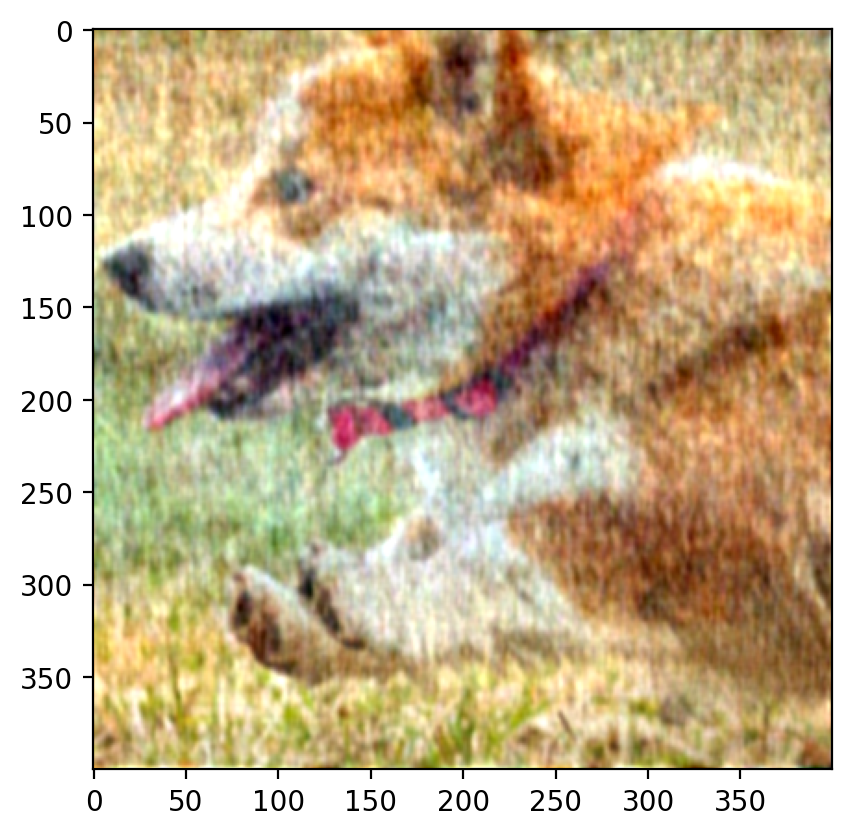

In [ ]:
with torch.no_grad():
      outputs = net(X_rff)
      outputs = outputs.reshape(400, 400, 3)
plt.imshow(outputs.cpu())

In [ ]:
def plot_reconstructed_and_original_image_RFF(original_img, net, X,maskedImage, title=""):
    """
    net: torch.nn.Module
    X: torch.Tensor of shape (num_samples, 2)
    Y: torch.Tensor of shape (num_samples, 3)
    """
    num_channels, height, width = original_img.shape
    net.eval()
    with torch.no_grad():
        outputs = net(X)
        outputs = outputs.reshape(400, 400, 3)
        #outputs = outputs.permute(1, 2, 0)
    fig = plt.figure(figsize=(6, 4))
    gs = gridspec.GridSpec(1, 3, width_ratios=[1, 1,1])

    ax0 = plt.subplot(gs[0])
    ax1 = plt.subplot(gs[1])
    ax2 = plt.subplot(gs[2])

    ax2.set_title(f" 400*400")
    ax2.imshow(outputs.cpu())
    ax0.set_title("Original Image")
    ax0.imshow(original_img.cpu().permute(1, 2, 0))
    ax1.set_title(" 200*200")
    #ax1.imshow(maskedImage.reshape(200,200,3).cpu().numpy())
    ax1.imshow(rearrange(maskedImage, 'c h w -> h w c').cpu().numpy())
    squared_error = torch.square(outputs.cpu() - original_img.cpu().permute(1,2,0))
    mse = torch.mean(squared_error)

    rmse = torch.sqrt(mse)

    max_val = 1.0
    psnr = 10 * torch.log10(max_val / rmse)
    print(f"Type: {title} , RMSE: {rmse}, PSNR: {psnr} \n")

# Calculate the PSNR
    for a in [ax0, ax1]:
        a.axis("off")


    fig.suptitle(title, y=0.9)
    plt.tight_layout()

## Question:2
<i>The above only helps us with a qualitative comparison. Let us now do a quantitative comparison. Compute the below given metrics:

1.RMSE on predicted v/s ground truth high resolution image

2.Peak SNR on predicted v/s ground truth high resolution image

<i> The formula calculating RMSE and PSNR is given as :
$$
\text{RMSE} = \sqrt{\frac{1}{N} \sum_{i=1}^{N} (I_{\text{orig}, i} - I_{\text{rec}, i})^2}
$$

$$
\text{PSNR} = 20 \cdot \log_{10}\left(\frac{R_{\text{max}}}{\text{RMSE}}\right)
$$

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-0.24470425..1.3195028].


Type: Reconstructed Image , RMSE: 0.12684848286599223, PSNR: 8.967147226627318 



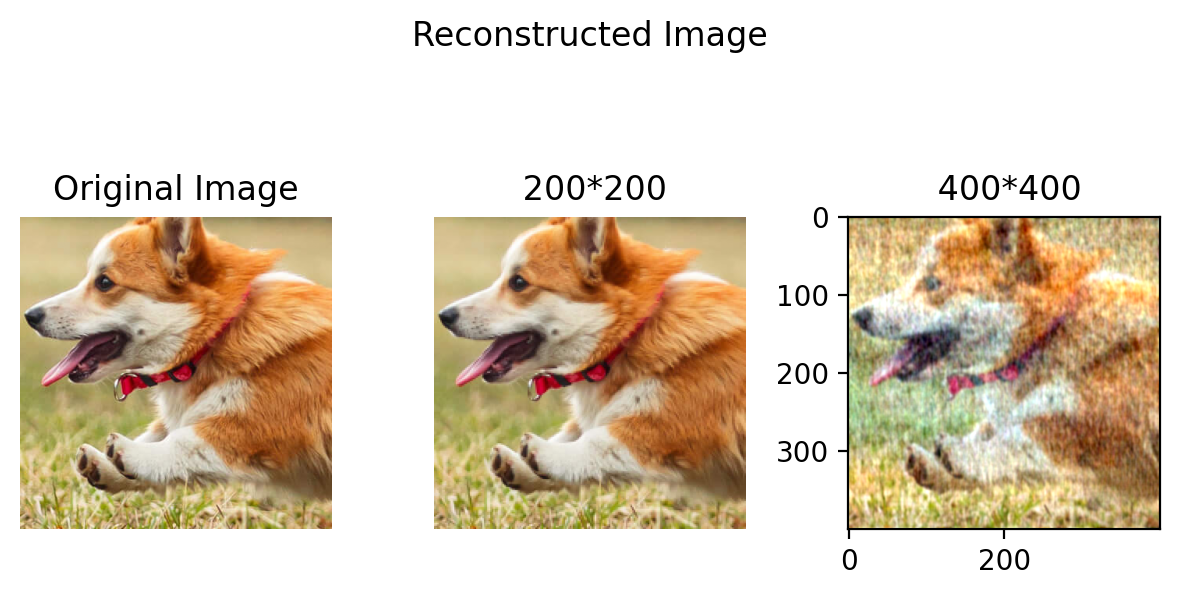

In [ ]:
plot_reconstructed_and_original_image_RFF(crop, net, X_rff,resized_img_tensor, title=f"Reconstructed Image")